# importing the library

In [25]:
# import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
import pandas as pd
from IPython import display
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
plt.style.use('ggplot')

#Load the dataset
#data = loadtxt('cal_housing.data', delimiter=',')
import sklearn.datasets as ds
dataset = ds.fetch_california_housing()
dataset.keys()
print(dataset.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




# Loading the dataset into x and y

In [26]:
X = dataset.data
y = dataset.target

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


# Split the dataset into training, validation, and testing

In [27]:
#from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

X, y = shuffle(X, y)

X_train = X[0:16512,]
X_test  = X[16512:,]
y_train = y[0:16512]
y_test  = y[16512:]

X_train1, y_train1 = shuffle(X_train, y_train)

print('X_train: ', X_train.shape)
print('X_test', X_test.shape) 

X_train = X_train1[0:13209,]
X_val   = X_train1[13209:,]
y_train = y_train1[0:13209]
y_val   = y_train1[13209:]

print('X_train: ', X_train.shape)
print('X val:', X_val.shape)
print('X_test', X_test.shape)
mean_x = []
max_x  = []

n_c = X_train.shape[1]

# Mean and scaling for training set
for i in range(n_c):
    m = np.mean(X_train[:, i])
    X_train[:,i] -= m
    mean_x.append(m)
    
    s = np.max(X_train[:, i])
    
    X_train[:,i] /= s
    max_x.append(s)

print('Mean:', mean_x)
print('Max:', max_x)

# Mean and scaling for test set
for i in range(n_c):
    X_val -= mean_x[i]
    X_val /= max_x[i]
    X_test[:,i] -= mean_x[i]    
    X_test[:,i] /= max_x[i]

X_train:  (16512, 8)
X_test (4128, 8)
X_train:  (13209, 8)
X val: (3303, 8)
X_test (4128, 8)
Mean: [3.8776746687864336, 28.687258687258687, 5.4300948278532664, 1.0955688817774498, 1421.568021803316, 3.1409375149098517, 35.649213415095765, -119.58754788401846]
Max: [11.122425331213567, 23.312741312741313, 136.47899608123765, 32.971097784889217, 14085.431978196684, 1240.1923958184234, 6.3007865849042375, 5.1175478840184638]


# Adding the bias for training and testing 

In [28]:
bias_train= np.ones((len(X_train), 1))
X_train = np.hstack((bias_train, X_train))
print(X_train.shape)

bias_val = np.ones((len(X_val), 1))
X_val = np.hstack((bias_val, X_val))
print(X_val.shape)

bias_test= np.ones((len(X_test), 1))
X_test = np.hstack((bias_test, X_test))
print(X_test.shape)

(13209, 9)
(3303, 9)
(4128, 9)


# Cost function

In [29]:
def cost_function(X, Y , theta):
    # Predict
    predections = np.dot(X, theta)
    
    # Compute Cost
    Cost = np.sqrt((1/len(X)) * np.sum((Y - predections)**2))

    return Cost 

# Normal Equation

In [30]:
def normalequation(X, y, delta):
    deltaI = delta * np.identity((9))
    deltaI[0] =  0
    
    XtX    = np.dot(X.T, X)
    XtY    = np.dot(X.T, y)
    invXdelta = np.linalg.inv((XtX + deltaI)) 

    theta = np.dot(invXdelta, XtY)
        
    return theta

# Using Normal Equation 

In [31]:
# Parameters 
#delta_value = [1e-20, 1e-18, 1e-14, 1e-7, 1e-3, 0.01, 0.1, 1]
delta_value = np.linspace(0, 1, 10000)
theta_normeq_all = []
val_loss_nq_all  = []
test_loss_nq_all = []

for i in delta_value:
    print('Delta Value:', i)
    
    # Calculate theta using normal Eguation 
    print(X_train.shape)
    theta_normeq = normalequation(X_train, y_train, i)
    
    print('Normal Equation')
    print(theta_normeq)
    theta_normeq_all.extend(theta_normeq)
    
    # Compute Validation set loss using normal equation
    val_cost_nq = cost_function(X_val, y_val, theta_normeq)
    val_loss_nq_all.append(val_cost_nq)
    
    # Compute test set loss
    test_loss_nq = cost_function(X_test, y_test , theta_normeq)
    test_loss_nq_all.append(test_loss_nq)
    
    print('******************************************************')
    
print('Done')

Delta Value: 0.0
(13209, 9)
Normal Equation
[  2.07285996e+00   4.87338264e+00   2.18903566e-01  -1.48319821e+01
   2.06514705e+01  -1.62778592e-02  -4.00176315e+00  -2.61077622e+00
  -2.17589948e+00]
******************************************************
Delta Value: 0.000100010001
(13209, 9)
Normal Equation
[  2.07285996e+00   4.87307664e+00   2.18906396e-01  -1.48249208e+01
   2.06432602e+01  -1.62610656e-02  -4.00135097e+00  -2.61088341e+00
  -2.17597367e+00]
******************************************************
Delta Value: 0.000200020002
(13209, 9)
Normal Equation
[  2.07285996e+00   4.87277091e+00   2.18909224e-01  -1.48178654e+01
   2.06350568e+01  -1.62442893e-02  -4.00093896e+00  -2.61099051e+00
  -2.17604780e+00]
******************************************************
Delta Value: 0.000300030003
(13209, 9)
Normal Equation
[  2.07285996e+00   4.87246543e+00   2.18912049e-01  -1.48108162e+01
   2.06268604e+01  -1.62275304e-02  -4.00052711e+00  -2.61109752e+00
  -2.17612187e+00

(13209, 9)
Normal Equation
[  2.07285996e+00   4.84713225e+00   2.19145581e-01  -1.42263075e+01
   1.99470706e+01  -1.48487107e-02  -3.96572603e+00  -2.61996286e+00
  -2.18225665e+00]
******************************************************
Delta Value: 0.00900090009001
(13209, 9)
Normal Equation
[  2.07285996e+00   4.84684819e+00   2.19148191e-01  -1.42197545e+01
   1.99394475e+01  -1.48333772e-02  -3.96532833e+00  -2.62006217e+00
  -2.18232536e+00]
******************************************************
Delta Value: 0.00910091009101
(13209, 9)
Normal Equation
[  2.07285996e+00   4.84656436e+00   2.19150798e-01  -1.42132068e+01
   1.99318305e+01  -1.48180591e-02  -3.96493079e+00  -2.62016139e+00
  -2.18239400e+00]
******************************************************
Delta Value: 0.00920092009201
(13209, 9)
Normal Equation
[  2.07285996e+00   4.84628077e+00   2.19153404e-01  -1.42066645e+01
   1.99242198e+01  -1.48027565e-02  -3.96453340e+00  -2.62026053e+00
  -2.18246259e+00]
*********

Normal Equation
[  2.07285996e+00   4.81878711e+00   2.19405024e-01  -1.35725347e+01
   1.91863111e+01  -1.33334973e-02  -3.92517061e+00  -2.62986023e+00
  -2.18910213e+00]
******************************************************
Delta Value: 0.019401940194
(13209, 9)
Normal Equation
[  2.07285996e+00   4.81852582e+00   2.19407406e-01  -1.35665092e+01
   1.91792974e+01  -1.33196741e-02  -3.92478829e+00  -2.62995135e+00
  -2.18916513e+00]
******************************************************
Delta Value: 0.019501950195
(13209, 9)
Normal Equation
[  2.07285996e+00   4.81826473e+00   2.19409786e-01  -1.35604885e+01
   1.91722893e+01  -1.33058646e-02  -3.92440610e+00  -2.63004239e+00
  -2.18922808e+00]
******************************************************
Delta Value: 0.019601960196
(13209, 9)
Normal Equation
[  2.07285996e+00   4.81800384e+00   2.19412164e-01  -1.35544726e+01
   1.91652866e+01  -1.32920686e-02  -3.92402406e+00  -2.63013337e+00
  -2.18929098e+00]
**************************

[  2.07285996e+00   4.79315347e+00   2.19637799e-01  -1.29815354e+01
   1.84981753e+01  -1.19908664e-02  -3.88687514e+00  -2.63878827e+00
  -2.19527360e+00]
******************************************************
Delta Value: 0.029602960296
(13209, 9)
Normal Equation
[  2.07285996e+00   4.79291195e+00   2.19639984e-01  -1.29759681e+01
   1.84916909e+01  -1.19783497e-02  -3.88650649e+00  -2.63887228e+00
  -2.19533165e+00]
******************************************************
Delta Value: 0.029702970297
(13209, 9)
Normal Equation
[  2.07285996e+00   4.79267061e+00   2.19642166e-01  -1.29704050e+01
   1.84852114e+01  -1.19658451e-02  -3.88613797e+00  -2.63895622e+00
  -2.19538966e+00]
******************************************************
Delta Value: 0.029802980298
(13209, 9)
Normal Equation
[  2.07285996e+00   4.79242946e+00   2.19644347e-01  -1.29648462e+01
   1.84787368e+01  -1.19533524e-02  -3.88576958e+00  -2.63904010e+00
  -2.19544762e+00]
******************************************

Delta Value: 0.041904190419
(13209, 9)
Normal Equation
[  2.07285996e+00   4.76453584e+00   2.19895378e-01  -1.23220325e+01
   1.77297408e+01  -1.05264228e-02  -3.84210482e+00  -2.64872682e+00
  -2.20213903e+00]
******************************************************
Delta Value: 0.04200420042
(13209, 9)
Normal Equation
[  2.07285996e+00   4.76431547e+00   2.19897351e-01  -1.23169553e+01
   1.77238227e+01  -1.05152976e-02  -3.84175121e+00  -2.64880322e+00
  -2.20219179e+00]
******************************************************
Delta Value: 0.042104210421
(13209, 9)
Normal Equation
[  2.07285996e+00   4.76409526e+00   2.19899323e-01  -1.23118819e+01
   1.77179089e+01  -1.05041828e-02  -3.84139773e+00  -2.64887957e+00
  -2.20224451e+00]
******************************************************
Delta Value: 0.042204220422
(13209, 9)
Normal Equation
[  2.07285996e+00   4.76387521e+00   2.19901294e-01  -1.23068121e+01
   1.77119993e+01  -1.04930785e-02  -3.84104435e+00  -2.64895586e+00
  -2.20

(13209, 9)
Normal Equation
[  2.07285996e+00   4.73756605e+00   2.20135674e-01  -1.17008253e+01
   1.70053408e+01  -9.18340910e-03  -3.79774669e+00  -2.65806135e+00
  -2.20858218e+00]
******************************************************
Delta Value: 0.0548054805481
(13209, 9)
Normal Equation
[  2.07285996e+00   4.73736473e+00   2.20137458e-01  -1.16961895e+01
   1.69999326e+01  -9.17353013e-03  -3.79740706e+00  -2.65813090e+00
  -2.20863017e+00]
******************************************************
Delta Value: 0.0549054905491
(13209, 9)
Normal Equation
[  2.07285996e+00   4.73716356e+00   2.20139240e-01  -1.16915570e+01
   1.69945281e+01  -9.16366021e-03  -3.79706754e+00  -2.65820040e+00
  -2.20867812e+00]
******************************************************
Delta Value: 0.0550055005501
(13209, 9)
Normal Equation
[  2.07285996e+00   4.73696252e+00   2.20141022e-01  -1.16869277e+01
   1.69891274e+01  -9.15379935e-03  -3.79672813e+00  -2.65826985e+00
  -2.20872604e+00]
************

Normal Equation
[  2.07285996e+00   4.71158993e+00   2.20364618e-01  -1.11028388e+01
   1.63074048e+01  -7.92797471e-03  -3.75280418e+00  -2.66701848e+00
  -2.21475953e+00]
******************************************************
Delta Value: 0.0683068306831
(13209, 9)
Normal Equation
[  2.07285996e+00   4.71140614e+00   2.20366229e-01  -1.10986093e+01
   1.63024660e+01  -7.91923592e-03  -3.75247786e+00  -2.66708173e+00
  -2.21480313e+00]
******************************************************
Delta Value: 0.0684068406841
(13209, 9)
Normal Equation
[  2.07285996e+00   4.71122248e+00   2.20367838e-01  -1.10943826e+01
   1.62975304e+01  -7.91050499e-03  -3.75215164e+00  -2.66714493e+00
  -2.21484669e+00]
******************************************************
Delta Value: 0.0685068506851
(13209, 9)
Normal Equation
[  2.07285996e+00   4.71103894e+00   2.20369446e-01  -1.10901586e+01
   1.62925981e+01  -7.90178191e-03  -3.75182551e+00  -2.66720809e+00
  -2.21489023e+00]
***********************

  -2.22101489e+00]
******************************************************
Delta Value: 0.0834083408341
(13209, 9)
Normal Equation
[  2.07285996e+00   4.68498029e+00   2.20596322e-01  -1.04906540e+01
   1.55921829e+01  -6.68537635e-03  -3.70424116e+00  -2.67615481e+00
  -2.22105422e+00]
******************************************************
Delta Value: 0.0835083508351
(13209, 9)
Normal Equation
[  2.07285996e+00   4.68481364e+00   2.20597764e-01  -1.04868213e+01
   1.55877027e+01  -6.67774396e-03  -3.70392834e+00  -2.67621189e+00
  -2.22109352e+00]
******************************************************
Delta Value: 0.0836083608361
(13209, 9)
Normal Equation
[  2.07285996e+00   4.68464710e+00   2.20599204e-01  -1.04829911e+01
   1.55832253e+01  -6.67011830e-03  -3.70361561e+00  -2.67626894e+00
  -2.22113280e+00]
******************************************************
Delta Value: 0.0837083708371
(13209, 9)
Normal Equation
[  2.07285996e+00   4.68448066e+00   2.20600643e-01  -1.04791634e+

******************************************************
Delta Value: 0.0974097409741
(13209, 9)
Normal Equation
[  2.07285996e+00   4.66262543e+00   2.20788529e-01  -9.97669681e+00
   1.49910836e+01  -5.67947054e-03  -3.66124072e+00  -2.68379496e+00
  -2.22631245e+00]
******************************************************
Delta Value: 0.0975097509751
(13209, 9)
Normal Equation
[  2.07285996e+00   4.66247252e+00   2.20789835e-01  -9.97318261e+00
   1.49869714e+01  -5.67271908e-03  -3.66093916e+00  -2.68384710e+00
  -2.22634831e+00]
******************************************************
Delta Value: 0.0976097609761
(13209, 9)
Normal Equation
[  2.07285996e+00   4.66231971e+00   2.20791141e-01  -9.96967054e+00
   1.49828616e+01  -5.66597349e-03  -3.66063767e+00  -2.68389920e+00
  -2.22638415e+00]
******************************************************
Delta Value: 0.0977097709771
(13209, 9)
Normal Equation
[  2.07285996e+00   4.66216699e+00   2.20792445e-01  -9.96616059e+00
   1.49787543e+0

Normal Equation
[  2.07285996e+00   4.64081417e+00   2.20973680e-01  -9.47557841e+00
   1.44043607e+01  -4.73533908e-03  -3.61712921e+00  -2.69121363e+00
  -2.23141256e+00]
******************************************************
Delta Value: 0.112411241124
(13209, 9)
Normal Equation
[  2.07285996e+00   4.64067411e+00   2.20974861e-01  -9.47236166e+00
   1.44005922e+01  -4.72940406e-03  -3.61683858e+00  -2.69126115e+00
  -2.23144520e+00]
******************************************************
Delta Value: 0.112511251125
(13209, 9)
Normal Equation
[  2.07285996e+00   4.64053413e+00   2.20976041e-01  -9.46914677e+00
   1.43968259e+01  -4.72347414e-03  -3.61654802e+00  -2.69130863e+00
  -2.23147783e+00]
******************************************************
Delta Value: 0.112611261126
(13209, 9)
Normal Equation
[  2.07285996e+00   4.64039423e+00   2.20977220e-01  -9.46593376e+00
   1.43930617e+01  -4.71754932e-03  -3.61625753e+00  -2.69135609e+00
  -2.23151043e+00]
**************************

Delta Value: 0.129812981298
(13209, 9)
Normal Equation
[  2.07285996e+00   4.61747316e+00   2.21168943e-01  -8.93973538e+00
   1.37761846e+01  -3.77049200e-03  -3.56730096e+00  -2.69910779e+00
  -2.23683236e+00]
******************************************************
Delta Value: 0.129912991299
(13209, 9)
Normal Equation
[  2.07285996e+00   4.61734622e+00   2.21169996e-01  -8.93682247e+00
   1.37727673e+01  -3.76538315e-03  -3.56702199e+00  -2.69915058e+00
  -2.23686172e+00]
******************************************************
Delta Value: 0.1300130013
(13209, 9)
Normal Equation
[  2.07285996e+00   4.61721935e+00   2.21171048e-01  -8.93391117e+00
   1.37693518e+01  -3.76027866e-03  -3.56674310e+00  -2.69919335e+00
  -2.23689106e+00]
******************************************************
Delta Value: 0.130113011301
(13209, 9)
Normal Equation
[  2.07285996e+00   4.61709255e+00   2.21172100e-01  -8.93100148e+00
   1.37659382e+01  -3.75517852e-03  -3.56646426e+00  -2.69923609e+00
  -2.236

(13209, 9)
Normal Equation
[  2.07285996e+00   4.59408423e+00   2.21361301e-01  -8.40329149e+00
   1.31463555e+01  -2.85657644e-03  -3.51432950e+00  -2.70696429e+00
  -2.24221766e+00]
******************************************************
Delta Value: 0.149314931493
(13209, 9)
Normal Equation
[  2.07285996e+00   4.59396979e+00   2.21362234e-01  -8.40066804e+00
   1.31432728e+01  -2.85224570e-03  -3.51406223e+00  -2.70700258e+00
  -2.24224388e+00]
******************************************************
Delta Value: 0.149414941494
(13209, 9)
Normal Equation
[  2.07285996e+00   4.59385541e+00   2.21363166e-01  -8.39804597e+00
   1.31401916e+01  -2.84791864e-03  -3.51379501e+00  -2.70704086e+00
  -2.24227010e+00]
******************************************************
Delta Value: 0.149514951495
(13209, 9)
Normal Equation
[  2.07285996e+00   4.59374109e+00   2.21364097e-01  -8.39542527e+00
   1.31371121e+01  -2.84359527e-03  -3.51352785e+00  -2.70707911e+00
  -2.24229629e+00]
***************

Normal Equation
[  2.07285996e+00   4.57398464e+00   2.21523679e-01  -7.94274769e+00
   1.26047659e+01  -2.11869968e-03  -3.46608611e+00  -2.71366584e+00
  -2.24680320e+00]
******************************************************
Delta Value: 0.167716771677
(13209, 9)
Normal Equation
[  2.07285996e+00   4.57388042e+00   2.21524513e-01  -7.94036097e+00
   1.26019569e+01  -2.11499740e-03  -3.46582890e+00  -2.71370046e+00
  -2.24682686e+00]
******************************************************
Delta Value: 0.167816781678
(13209, 9)
Normal Equation
[  2.07285996e+00   4.57377626e+00   2.21525347e-01  -7.93797546e+00
   1.25991492e+01  -2.11129829e-03  -3.46557175e+00  -2.71373505e+00
  -2.24685051e+00]
******************************************************
Delta Value: 0.167916791679
(13209, 9)
Normal Equation
[  2.07285996e+00   4.57367215e+00   2.21526180e-01  -7.93559114e+00
   1.25963430e+01  -2.10760233e-03  -3.46531465e+00  -2.71376963e+00
  -2.24687415e+00]
**************************

(13209, 9)
Normal Equation
[  2.07285996e+00   4.55450212e+00   2.21678216e-01  -7.49680298e+00
   1.20794592e+01  -1.45041966e-03  -3.41664353e+00  -2.72011045e+00
  -2.25120461e+00]
******************************************************
Delta Value: 0.187318731873
(13209, 9)
Normal Equation
[  2.07285996e+00   4.55440736e+00   2.21678960e-01  -7.49463514e+00
   1.20769033e+01  -1.44729067e-03  -3.41639612e+00  -2.72014166e+00
  -2.25122591e+00]
******************************************************
Delta Value: 0.187418741874
(13209, 9)
Normal Equation
[  2.07285996e+00   4.55431265e+00   2.21679704e-01  -7.49246835e+00
   1.20743485e+01  -1.44416439e-03  -3.41614876e+00  -2.72017286e+00
  -2.25124719e+00]
******************************************************
Delta Value: 0.187518751875
(13209, 9)
Normal Equation
[  2.07285996e+00   4.55421797e+00   2.21680447e-01  -7.49030259e+00
   1.20717949e+01  -1.44104081e-03  -3.41590146e+00  -2.72020404e+00
  -2.25126846e+00]
***************

Delta Value: 0.205620562056
(13209, 9)
Normal Equation
[  2.07285996e+00   4.53779057e+00   2.21808320e-01  -7.11469265e+00
   1.16285563e+01  -9.18090143e-04  -3.37190525e+00  -2.72559233e+00
  -2.25494098e+00]
******************************************************
Delta Value: 0.205720572057
(13209, 9)
Normal Equation
[  2.07285996e+00   4.53770356e+00   2.21808991e-01  -7.11270425e+00
   1.16262078e+01  -9.15424463e-04  -3.37166631e+00  -2.72562075e+00
  -2.25496033e+00]
******************************************************
Delta Value: 0.205820582058
(13209, 9)
Normal Equation
[  2.07285996e+00   4.53761659e+00   2.21809662e-01  -7.11071677e+00
   1.16238604e+01  -9.12761126e-04  -3.37142741e+00  -2.72564915e+00
  -2.25497967e+00]
******************************************************
Delta Value: 0.205920592059
(13209, 9)
Normal Equation
[  2.07285996e+00   4.53752966e+00   2.21810332e-01  -7.10873020e+00
   1.16215141e+01  -9.10100130e-04  -3.37118855e+00  -2.72567754e+00
  -2.2

Delta Value: 0.224622462246
(13209, 9)
Normal Equation
[  2.07285996e+00   4.52193901e+00   2.21929448e-01  -6.75263902e+00
   1.12005558e+01  -4.51755927e-04  -3.32727955e+00  -2.73074709e+00
  -2.25844698e+00]
******************************************************
Delta Value: 0.224722472247
(13209, 9)
Normal Equation
[  2.07285996e+00   4.52185905e+00   2.21930053e-01  -6.75081373e+00
   1.11983960e+01  -4.49505163e-04  -3.32704869e+00  -2.73077297e+00
  -2.25846456e+00]
******************************************************
Delta Value: 0.224822482248
(13209, 9)
Normal Equation
[  2.07285996e+00   4.52177912e+00   2.21930657e-01  -6.74898925e+00
   1.11962372e+01  -4.47256431e-04  -3.32681787e+00  -2.73079884e+00
  -2.25848213e+00]
******************************************************
Delta Value: 0.224922492249
(13209, 9)
Normal Equation
[  2.07285996e+00   4.52169923e+00   2.21931262e-01  -6.74716558e+00
   1.11940792e+01  -4.45009729e-04  -3.32658710e+00  -2.73082469e+00
  -2.2

Delta Value: 0.243524352435
(13209, 9)
Normal Equation
[  2.07285996e+00   4.50742044e+00   2.22038279e-01  -6.42140714e+00
   1.08082557e+01  -6.08676871e-05  -3.28435785e+00  -2.73542474e+00
  -2.26162124e+00]
******************************************************
Delta Value: 0.243624362436
(13209, 9)
Normal Equation
[  2.07285996e+00   4.50734668e+00   2.22038826e-01  -6.41972519e+00
   1.08062617e+01  -5.89757467e-05  -3.28413446e+00  -2.73544839e+00
  -2.26163727e+00]
******************************************************
Delta Value: 0.243724372437
(13209, 9)
Normal Equation
[  2.07285996e+00   4.50727294e+00   2.22039374e-01  -6.41804395e+00
   1.08042685e+01  -5.70855773e-05  -3.28391111e+00  -2.73547203e+00
  -2.26165329e+00]
******************************************************
Delta Value: 0.243824382438
(13209, 9)
Normal Equation
[  2.07285996e+00   4.50719924e+00   2.22039921e-01  -6.41636343e+00
   1.08022762e+01  -5.51971777e-05  -3.28368780e+00  -2.73549565e+00
  -2.2

  -2.26460651e+00]
******************************************************
Delta Value: 0.263126312631
(13209, 9)
Normal Equation
[  2.07285996e+00   4.49352852e+00   2.22140375e-01  -6.10484772e+00
   1.04325939e+01   2.77614917e-04  -3.24128598e+00  -2.73985628e+00
  -2.26462111e+00]
******************************************************
Delta Value: 0.263226322632
(13209, 9)
Normal Equation
[  2.07285996e+00   4.49346045e+00   2.22140870e-01  -6.10329750e+00
   1.04307524e+01   2.79182712e-04  -3.24106981e+00  -2.73987788e+00
  -2.26463572e+00]
******************************************************
Delta Value: 0.263326332633
(13209, 9)
Normal Equation
[  2.07285996e+00   4.49339240e+00   2.22141365e-01  -6.10174791e+00
   1.04289115e+01   2.80748965e-04  -3.24085368e+00  -2.73989947e+00
  -2.26465031e+00]
******************************************************
Delta Value: 0.263426342634
(13209, 9)
Normal Equation
[  2.07285996e+00   4.49332438e+00   2.22141860e-01  -6.10019894e+00
 

[  2.07285996e+00   4.48144714e+00   2.22227428e-01  -5.82987770e+00
   1.01056305e+01   5.41189105e-04  -3.20209766e+00  -2.74367072e+00
  -2.26719659e+00]
******************************************************
Delta Value: 0.281628162816
(13209, 9)
Normal Equation
[  2.07285996e+00   4.48138383e+00   2.22227879e-01  -5.82843771e+00
   1.01039165e+01   5.42490428e-04  -3.20188784e+00  -2.74369060e+00
  -2.26721000e+00]
******************************************************
Delta Value: 0.281728172817
(13209, 9)
Normal Equation
[  2.07285996e+00   4.48132055e+00   2.22228331e-01  -5.82699830e+00
   1.01022032e+01   5.43790392e-04  -3.20167805e+00  -2.74371048e+00
  -2.26722340e+00]
******************************************************
Delta Value: 0.281828182818
(13209, 9)
Normal Equation
[  2.07285996e+00   4.48125729e+00   2.22228782e-01  -5.82555945e+00
   1.01004905e+01   5.45088999e-04  -3.20146829e+00  -2.74373034e+00
  -2.26723679e+00]
******************************************

Normal Equation
[  2.07285996e+00   4.46966698e+00   2.22310647e-01  -5.56209299e+00
   9.78655771e+00   7.68228947e-04  -3.16220850e+00  -2.74735036e+00
  -2.26967430e+00]
******************************************************
Delta Value: 0.300930093009
(13209, 9)
Normal Equation
[  2.07285996e+00   4.46960816e+00   2.22311058e-01  -5.56075664e+00
   9.78496367e+00   7.69284415e-04  -3.16200493e+00  -2.74736863e+00
  -2.26968659e+00]
******************************************************
Delta Value: 0.30103010301
(13209, 9)
Normal Equation
[  2.07285996e+00   4.46954935e+00   2.22311469e-01  -5.55942079e+00
   9.78337022e+00   7.70338690e-04  -3.16180139e+00  -2.74738689e+00
  -2.26969886e+00]
******************************************************
Delta Value: 0.301130113011
(13209, 9)
Normal Equation
[  2.07285996e+00   4.46949057e+00   2.22311880e-01  -5.55808545e+00
   9.78177736e+00   7.71391773e-04  -3.16159789e+00  -2.74740515e+00
  -2.26971114e+00]
***************************

Normal Equation
[  2.07285996e+00   4.45815932e+00   2.22390254e-01  -5.30084937e+00
   9.47458814e+00   9.59080556e-04  -3.12151510e+00  -2.75090261e+00
  -2.27205898e+00]
******************************************************
Delta Value: 0.321232123212
(13209, 9)
Normal Equation
[  2.07285996e+00   4.45810471e+00   2.22390627e-01  -5.29961056e+00
   9.47310704e+00   9.59909326e-04  -3.12131771e+00  -2.75091936e+00
  -2.27207020e+00]
******************************************************
Delta Value: 0.321332133213
(13209, 9)
Normal Equation
[  2.07285996e+00   4.45805012e+00   2.22391001e-01  -5.29837221e+00
   9.47162647e+00   9.60737052e-04  -3.12112036e+00  -2.75093610e+00
  -2.27208143e+00]
******************************************************
Delta Value: 0.321432143214
(13209, 9)
Normal Equation
[  2.07285996e+00   4.45799555e+00   2.22391374e-01  -5.29713431e+00
   9.47014643e+00   9.61563735e-04  -3.12092303e+00  -2.75095283e+00
  -2.27209264e+00]
**************************

******************************************************
Delta Value: 0.340534053405
(13209, 9)
Normal Equation
[  2.07285996e+00   4.44792096e+00   2.22459592e-01  -5.06873894e+00
   9.19677370e+00   1.10110608e-03  -3.08376482e+00  -2.75402388e+00
  -2.27414755e+00]
******************************************************
Delta Value: 0.340634063406
(13209, 9)
Normal Equation
[  2.07285996e+00   4.44786997e+00   2.22459934e-01  -5.06758386e+00
   9.19538956e+00   1.10174448e-03  -3.08357300e+00  -2.75403932e+00
  -2.27415786e+00]
******************************************************
Delta Value: 0.340734073407
(13209, 9)
Normal Equation
[  2.07285996e+00   4.44781900e+00   2.22460275e-01  -5.06642918e+00
   9.19400591e+00   1.10238195e-03  -3.08338121e+00  -2.75405476e+00
  -2.27416818e+00]
******************************************************
Delta Value: 0.340834083408
(13209, 9)
Normal Equation
[  2.07285996e+00   4.44776805e+00   2.22460617e-01  -5.06527491e+00
   9.19262272e+00   

Normal Equation
[  2.07285996e+00   4.43892459e+00   2.22519299e-01  -4.86505629e+00
   8.95244157e+00   1.20268269e-03  -3.04930606e+00  -2.75673277e+00
  -2.27595426e+00]
******************************************************
Delta Value: 0.358835883588
(13209, 9)
Normal Equation
[  2.07285996e+00   4.43887669e+00   2.22519614e-01  -4.86397238e+00
   8.95113991e+00   1.20316269e-03  -3.04911919e+00  -2.75674710e+00
  -2.27596380e+00]
******************************************************
Delta Value: 0.358935893589
(13209, 9)
Normal Equation
[  2.07285996e+00   4.43882880e+00   2.22519929e-01  -4.86288885e+00
   8.94983867e+00   1.20364187e-03  -3.04893236e+00  -2.75676143e+00
  -2.27597334e+00]
******************************************************
Delta Value: 0.35903590359
(13209, 9)
Normal Equation
[  2.07285996e+00   4.43878092e+00   2.22520243e-01  -4.86180570e+00
   8.94853787e+00   1.20412023e-03  -3.04874554e+00  -2.75677576e+00
  -2.27598288e+00]
***************************

Delta Value: 0.378737873787
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42965425e+00   2.22579569e-01  -4.65546033e+00
   8.70043348e+00   1.28299784e-03  -3.01245124e+00  -2.75948771e+00
  -2.27778522e+00]
******************************************************
Delta Value: 0.378837883788
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42960942e+00   2.22579857e-01  -4.65444745e+00
   8.69921412e+00   1.28332342e-03  -3.01226954e+00  -2.75950094e+00
  -2.27779399e+00]
******************************************************
Delta Value: 0.378937893789
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42956460e+00   2.22580145e-01  -4.65343490e+00
   8.69799514e+00   1.28364827e-03  -3.01208786e+00  -2.75951416e+00
  -2.27780276e+00]
******************************************************
Delta Value: 0.37903790379
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42951979e+00   2.22580433e-01  -4.65242270e+00
   8.69677656e+00   1.28397240e-03  -3.01190621e+00  -2.75952738e+00
  -2.27

Delta Value: 0.397239723972
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42160174e+00   2.22630838e-01  -4.47365857e+00
   8.48132011e+00   1.33134119e-03  -2.97925719e+00  -2.76184775e+00
  -2.27934780e+00]
******************************************************
Delta Value: 0.397339733973
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42155949e+00   2.22631104e-01  -4.47270546e+00
   8.48017003e+00   1.33153996e-03  -2.97908002e+00  -2.76186005e+00
  -2.27935593e+00]
******************************************************
Delta Value: 0.397439743974
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42151726e+00   2.22631371e-01  -4.47175266e+00
   8.47902031e+00   1.33173807e-03  -2.97890288e+00  -2.76187234e+00
  -2.27936405e+00]
******************************************************
Delta Value: 0.397539753975
(13209, 9)
Normal Equation
[  2.07285996e+00   4.42147504e+00   2.22631637e-01  -4.47080016e+00
   8.47787094e+00   1.33193554e-03  -2.97872577e+00  -2.76188463e+00
  -2.2

******************************************************
Delta Value: 0.416741674167
(13209, 9)
Normal Equation
[  2.07285996e+00   4.41360921e+00   2.22680686e-01  -4.29347079e+00
   8.26362701e+00   1.35832126e-03  -2.94515616e+00  -2.76415692e+00
  -2.28087065e+00]
******************************************************
Delta Value: 0.416841684168
(13209, 9)
Normal Equation
[  2.07285996e+00   4.41356946e+00   2.22680931e-01  -4.29257524e+00
   8.26254367e+00   1.35840095e-03  -2.94498355e+00  -2.76416832e+00
  -2.28087815e+00]
******************************************************
Delta Value: 0.416941694169
(13209, 9)
Normal Equation
[  2.07285996e+00   4.41352972e+00   2.22681176e-01  -4.29167997e+00
   8.26146066e+00   1.35848006e-03  -2.94481097e+00  -2.76417972e+00
  -2.28088565e+00]
******************************************************
Delta Value: 0.41704170417
(13209, 9)
Normal Equation
[  2.07285996e+00   4.41348999e+00   2.22681421e-01  -4.29078498e+00
   8.26037798e+00   1

[  2.07285996e+00   4.40593157e+00   2.22727554e-01  -4.12064634e+00
   8.05429452e+00   1.36327973e-03  -2.91125034e+00  -2.76634094e+00
  -2.28230466e+00]
******************************************************
Delta Value: 0.436743674367
(13209, 9)
Normal Equation
[  2.07285996e+00   4.40589414e+00   2.22727780e-01  -4.11980442e+00
   8.05327339e+00   1.36325148e-03  -2.91108217e+00  -2.76635150e+00
  -2.28231158e+00]
******************************************************
Delta Value: 0.436843684368
(13209, 9)
Normal Equation
[  2.07285996e+00   4.40585672e+00   2.22728006e-01  -4.11896276e+00
   8.05225256e+00   1.36322271e-03  -2.91091402e+00  -2.76636206e+00
  -2.28231850e+00]
******************************************************
Delta Value: 0.436943694369
(13209, 9)
Normal Equation
[  2.07285996e+00   4.40581931e+00   2.22728232e-01  -4.11812136e+00
   8.05123203e+00   1.36319343e-03  -2.91074589e+00  -2.76637261e+00
  -2.28232541e+00]
******************************************

[  2.07285996e+00   4.39904976e+00   2.22768687e-01  -3.96597448e+00
   7.86646547e+00   1.34919315e-03  -2.87984682e+00  -2.76826749e+00
  -2.28356381e+00]
******************************************************
Delta Value: 0.455645564556
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39901435e+00   2.22768896e-01  -3.96517926e+00
   7.86549852e+00   1.34907356e-03  -2.87968267e+00  -2.76827732e+00
  -2.28357022e+00]
******************************************************
Delta Value: 0.455745574557
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39897895e+00   2.22769105e-01  -3.96438427e+00
   7.86453185e+00   1.34895351e-03  -2.87951854e+00  -2.76828715e+00
  -2.28357663e+00]
******************************************************
Delta Value: 0.455845584558
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39894357e+00   2.22769315e-01  -3.96358952e+00
   7.86356545e+00   1.34883301e-03  -2.87935443e+00  -2.76829698e+00
  -2.28358303e+00]
******************************************

******************************************************
Delta Value: 0.474647464746
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39246781e+00   2.22807224e-01  -3.81826980e+00
   7.68663430e+00   1.31836530e-03  -2.84886648e+00  -2.77008017e+00
  -2.28474285e+00]
******************************************************
Delta Value: 0.474747474747
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39243428e+00   2.22807418e-01  -3.81751801e+00
   7.68571778e+00   1.31816320e-03  -2.84870622e+00  -2.77008932e+00
  -2.28474879e+00]
******************************************************
Delta Value: 0.474847484748
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39240077e+00   2.22807612e-01  -3.81676644e+00
   7.68480151e+00   1.31796069e-03  -2.84854598e+00  -2.77009847e+00
  -2.28475472e+00]
******************************************************
Delta Value: 0.474947494749
(13209, 9)
Normal Equation
[  2.07285996e+00   4.39236726e+00   2.22807806e-01  -3.81601509e+00
   7.68388549e+00   

[  2.07285996e+00   4.38607226e+00   2.22843894e-01  -3.67497772e+00
   7.51170788e+00   1.27124029e-03  -2.81783110e+00  -2.77181109e+00
  -2.28586284e+00]
******************************************************
Delta Value: 0.494349434943
(13209, 9)
Normal Equation
[  2.07285996e+00   4.38604051e+00   2.22844074e-01  -3.67426700e+00
   7.51083904e+00   1.27096258e-03  -2.81767466e+00  -2.77181961e+00
  -2.28586833e+00]
******************************************************
Delta Value: 0.494449444944
(13209, 9)
Normal Equation
[  2.07285996e+00   4.38600877e+00   2.22844254e-01  -3.67355647e+00
   7.50997043e+00   1.27068451e-03  -2.81751825e+00  -2.77182812e+00
  -2.28587382e+00]
******************************************************
Delta Value: 0.494549454945
(13209, 9)
Normal Equation
[  2.07285996e+00   4.38597704e+00   2.22844434e-01  -3.67284614e+00
   7.50910205e+00   1.27040607e-03  -2.81736185e+00  -2.77183662e+00
  -2.28587931e+00]
******************************************

(13209, 9)
Normal Equation
[  2.07285996e+00   4.37995152e+00   2.22878253e-01  -3.53807113e+00
   7.34411151e+00   1.20941802e-03  -2.78722393e+00  -2.77343719e+00
  -2.28690904e+00]
******************************************************
Delta Value: 0.514151415142
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37992143e+00   2.22878420e-01  -3.53739864e+00
   7.34328709e+00   1.20907222e-03  -2.78707119e+00  -2.77344511e+00
  -2.28691411e+00]
******************************************************
Delta Value: 0.514251425143
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37989135e+00   2.22878587e-01  -3.53672634e+00
   7.34246289e+00   1.20872610e-03  -2.78691848e+00  -2.77345302e+00
  -2.28691919e+00]
******************************************************
Delta Value: 0.514351435144
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37986127e+00   2.22878754e-01  -3.53605422e+00
   7.34163890e+00   1.20837966e-03  -2.78676578e+00  -2.77346093e+00
  -2.28692426e+00]
***************

******************************************************
Delta Value: 0.534053405341
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37408914e+00   2.22910469e-01  -3.40716826e+00
   7.18340548e+00   1.13404350e-03  -2.75703618e+00  -2.77496442e+00
  -2.28788558e+00]
******************************************************
Delta Value: 0.534153415342
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37406060e+00   2.22910624e-01  -3.40653142e+00
   7.18262251e+00   1.13363643e-03  -2.75688703e+00  -2.77497178e+00
  -2.28789027e+00]
******************************************************
Delta Value: 0.534253425343
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37403206e+00   2.22910779e-01  -3.40589476e+00
   7.18183973e+00   1.13322907e-03  -2.75673790e+00  -2.77497913e+00
  -2.28789496e+00]
******************************************************
Delta Value: 0.534353435344
(13209, 9)
Normal Equation
[  2.07285996e+00   4.37400353e+00   2.22910934e-01  -3.40525827e+00
   7.18105714e+00   

Delta Value: 0.554055405541
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36852413e+00   2.22940409e-01  -3.28312427e+00
   7.03067312e+00   1.04709562e-03  -2.72755095e+00  -2.77638457e+00
  -2.28878763e+00]
******************************************************
Delta Value: 0.554155415542
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36849702e+00   2.22940554e-01  -3.28252041e+00
   7.02992847e+00   1.04663399e-03  -2.72740525e+00  -2.77639142e+00
  -2.28879197e+00]
******************************************************
Delta Value: 0.554255425543
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36846991e+00   2.22940698e-01  -3.28191670e+00
   7.02918401e+00   1.04617210e-03  -2.72725955e+00  -2.77639826e+00
  -2.28879630e+00]
******************************************************
Delta Value: 0.554355435544
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36844281e+00   2.22940842e-01  -3.28131315e+00
   7.02843974e+00   1.04570996e-03  -2.72711388e+00  -2.77640510e+00
  -2.2

Delta Value: 0.573757375738
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36331184e+00   2.22967875e-01  -3.16714925e+00
   6.88745248e+00   9.51371859e-04  -2.69916768e+00  -2.77768651e+00
  -2.28960874e+00]
******************************************************
Delta Value: 0.573857385739
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36328603e+00   2.22968010e-01  -3.16657548e+00
   6.88674285e+00   9.50862343e-04  -2.69902523e+00  -2.77769289e+00
  -2.28961275e+00]
******************************************************
Delta Value: 0.57395739574
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36326022e+00   2.22968145e-01  -3.16600186e+00
   6.88603340e+00   9.50352598e-04  -2.69888280e+00  -2.77769926e+00
  -2.28961675e+00]
******************************************************
Delta Value: 0.574057405741
(13209, 9)
Normal Equation
[  2.07285996e+00   4.36323443e+00   2.22968279e-01  -3.16542839e+00
   6.88532412e+00   9.49842623e-04  -2.69874038e+00  -2.77770563e+00
  -2.28

(13209, 9)
Normal Equation
[  2.07285996e+00   4.35837216e+00   2.22993381e-01  -3.05743781e+00
   6.75156243e+00   8.47284330e-04  -2.67155331e+00  -2.77889325e+00
  -2.29036407e+00]
******************************************************
Delta Value: 0.593459345935
(13209, 9)
Normal Equation
[  2.07285996e+00   4.35834756e+00   2.22993507e-01  -3.05689188e+00
   6.75088520e+00   8.46732323e-04  -2.67141398e+00  -2.77889919e+00
  -2.29036777e+00]
******************************************************
Delta Value: 0.593559355936
(13209, 9)
Normal Equation
[  2.07285996e+00   4.35832296e+00   2.22993633e-01  -3.05634608e+00
   6.75020813e+00   8.46180110e-04  -2.67127466e+00  -2.77890513e+00
  -2.29037147e+00]
******************************************************
Delta Value: 0.593659365937
(13209, 9)
Normal Equation
[  2.07285996e+00   4.35829837e+00   2.22993758e-01  -3.05580042e+00
   6.74953122e+00   8.45627693e-04  -2.67113536e+00  -2.77891107e+00
  -2.29037517e+00]
***************

(13209, 9)
Normal Equation
[  2.07285996e+00   4.35354361e+00   2.23017814e-01  -2.95039299e+00
   6.61856883e+00   7.32374711e-04  -2.64385752e+00  -2.78004546e+00
  -2.29107932e+00]
******************************************************
Delta Value: 0.613561356136
(13209, 9)
Normal Equation
[  2.07285996e+00   4.35352016e+00   2.23017932e-01  -2.94987361e+00
   6.61792252e+00   7.31783911e-04  -2.64372127e+00  -2.78005099e+00
  -2.29108274e+00]
******************************************************
Delta Value: 0.613661366137
(13209, 9)
Normal Equation
[  2.07285996e+00   4.35349672e+00   2.23018049e-01  -2.94935436e+00
   6.61727637e+00   7.31192928e-04  -2.64358503e+00  -2.78005651e+00
  -2.29108615e+00]
******************************************************
Delta Value: 0.613761376138
(13209, 9)
Normal Equation
[  2.07285996e+00   4.35347328e+00   2.23018167e-01  -2.94883524e+00
   6.61663036e+00   7.30601764e-04  -2.64344881e+00  -2.78006204e+00
  -2.29108956e+00]
***************

Normal Equation
[  2.07285996e+00   4.34914025e+00   2.23039662e-01  -2.85295672e+00
   6.49713953e+00   6.15729977e-04  -2.61796956e+00  -2.78107091e+00
  -2.29171028e+00]
******************************************************
Delta Value: 0.632763276328
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34911783e+00   2.23039772e-01  -2.85246099e+00
   6.49652078e+00   6.15106183e-04  -2.61783614e+00  -2.78107607e+00
  -2.29171344e+00]
******************************************************
Delta Value: 0.632863286329
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34909541e+00   2.23039882e-01  -2.85196539e+00
   6.49590218e+00   6.14482227e-04  -2.61770274e+00  -2.78108123e+00
  -2.29171660e+00]
******************************************************
Delta Value: 0.63296329633
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34907300e+00   2.23039992e-01  -2.85146990e+00
   6.49528371e+00   6.13858109e-04  -2.61756935e+00  -2.78108638e+00
  -2.29171975e+00]
***************************

Delta Value: 0.653065306531
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34467037e+00   2.23061413e-01  -2.75423781e+00
   6.37372361e+00   4.85249510e-04  -2.59104947e+00  -2.78208542e+00
  -2.29232851e+00]
******************************************************
Delta Value: 0.653165316532
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34464896e+00   2.23061516e-01  -2.75376555e+00
   6.37313221e+00   4.84594567e-04  -2.59091896e+00  -2.78209021e+00
  -2.29233141e+00]
******************************************************
Delta Value: 0.653265326533
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34462756e+00   2.23061619e-01  -2.75329339e+00
   6.37254095e+00   4.83939481e-04  -2.59078846e+00  -2.78209500e+00
  -2.29233431e+00]
******************************************************
Delta Value: 0.653365336534
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34460616e+00   2.23061722e-01  -2.75282135e+00
   6.37194981e+00   4.83284252e-04  -2.59065798e+00  -2.78209979e+00
  -2.2

[  2.07285996e+00   4.34060605e+00   2.23080816e-01  -2.66465228e+00
   6.26136523e+00   3.55606567e-04  -2.56598940e+00  -2.78298319e+00
  -2.29286983e+00]
******************************************************
Delta Value: 0.672567256726
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34058555e+00   2.23080913e-01  -2.66420087e+00
   6.26079815e+00   3.54925367e-04  -2.56586156e+00  -2.78298765e+00
  -2.29287251e+00]
******************************************************
Delta Value: 0.672667266727
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34056506e+00   2.23081010e-01  -2.66374956e+00
   6.26023120e+00   3.54244040e-04  -2.56573373e+00  -2.78299212e+00
  -2.29287519e+00]
******************************************************
Delta Value: 0.672767276728
(13209, 9)
Normal Equation
[  2.07285996e+00   4.34054457e+00   2.23081107e-01  -2.66329835e+00
   6.25966437e+00   3.53562585e-04  -2.56560591e+00  -2.78299658e+00
  -2.29287786e+00]
******************************************

Delta Value: 0.691469146915
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33679053e+00   2.23098708e-01  -2.58071259e+00
   6.15575600e+00   2.23976841e-04  -2.54193923e+00  -2.78380316e+00
  -2.29335880e+00]
******************************************************
Delta Value: 0.691569156916
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33677086e+00   2.23098799e-01  -2.58028033e+00
   6.15521129e+00   2.23272795e-04  -2.54181392e+00  -2.78380733e+00
  -2.29336127e+00]
******************************************************
Delta Value: 0.691669166917
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33675120e+00   2.23098891e-01  -2.57984817e+00
   6.15466669e+00   2.22568635e-04  -2.54168861e+00  -2.78381150e+00
  -2.29336374e+00]
******************************************************
Delta Value: 0.691769176918
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33673154e+00   2.23098982e-01  -2.57941610e+00
   6.15412220e+00   2.21864362e-04  -2.54156332e+00  -2.78381566e+00
  -2.2

Normal Equation
[  2.07285996e+00   4.33295852e+00   2.23116362e-01  -2.49657745e+00
   6.04955829e+00   8.17307064e-05  -2.51725575e+00  -2.78460300e+00
  -2.29382993e+00]
******************************************************
Delta Value: 0.711471147115
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33293967e+00   2.23116448e-01  -2.49616403e+00
   6.04903557e+00   8.10054839e-05  -2.51713299e+00  -2.78460687e+00
  -2.29383219e+00]
******************************************************
Delta Value: 0.711571157116
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33292082e+00   2.23116535e-01  -2.49575069e+00
   6.04851296e+00   8.02801616e-05  -2.51701024e+00  -2.78461074e+00
  -2.29383446e+00]
******************************************************
Delta Value: 0.711671167117
(13209, 9)
Normal Equation
[  2.07285996e+00   4.33290198e+00   2.23116621e-01  -2.49533745e+00
   6.04799045e+00   7.95547396e-05  -2.51688751e+00  -2.78461462e+00
  -2.29383672e+00]
**************************

Delta Value: 0.730773077308
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32937476e+00   2.23132590e-01  -2.41805362e+00
   5.95011467e+00  -6.07548831e-05  -2.49367444e+00  -2.78532819e+00
  -2.29425131e+00]
******************************************************
Delta Value: 0.730873087309
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32935666e+00   2.23132671e-01  -2.41765743e+00
   5.94961210e+00  -6.14982938e-05  -2.49355409e+00  -2.78533179e+00
  -2.29425339e+00]
******************************************************
Delta Value: 0.73097309731
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32933857e+00   2.23132752e-01  -2.41726133e+00
   5.94910963e+00  -6.22417923e-05  -2.49343376e+00  -2.78533540e+00
  -2.29425547e+00]
******************************************************
Delta Value: 0.731073107311
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32932047e+00   2.23132834e-01  -2.41686532e+00
   5.94860726e+00  -6.29853787e-05  -2.49331344e+00  -2.78533900e+00
  -2.29

Normal Equation
[  2.07285996e+00   4.32603653e+00   2.23147462e-01  -2.34505697e+00
   5.85736892e+00  -2.01998764e-04  -2.47126193e+00  -2.78598263e+00
  -2.29462609e+00]
******************************************************
Delta Value: 0.749674967497
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32601912e+00   2.23147539e-01  -2.34467653e+00
   5.85688476e+00  -2.02757702e-04  -2.47114385e+00  -2.78598599e+00
  -2.29462800e+00]
******************************************************
Delta Value: 0.749774977498
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32600171e+00   2.23147616e-01  -2.34429616e+00
   5.85640069e+00  -2.03516718e-04  -2.47102578e+00  -2.78598934e+00
  -2.29462991e+00]
******************************************************
Delta Value: 0.749874987499
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32598430e+00   2.23147693e-01  -2.34391588e+00
   5.85591671e+00  -2.04275812e-04  -2.47090772e+00  -2.78599270e+00
  -2.29463181e+00]
**************************

******************************************************
Delta Value: 0.769576957696
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32262231e+00   2.23162434e-01  -2.27055381e+00
   5.76239132e+00  -3.55259117e-04  -2.44787875e+00  -2.78662969e+00
  -2.29499065e+00]
******************************************************
Delta Value: 0.769676967697
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32260558e+00   2.23162507e-01  -2.27018914e+00
   5.76192562e+00  -3.56032517e-04  -2.44776301e+00  -2.78663280e+00
  -2.29499239e+00]
******************************************************
Delta Value: 0.769776977698
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32258885e+00   2.23162580e-01  -2.26982455e+00
   5.76146001e+00  -3.56805985e-04  -2.44764727e+00  -2.78663591e+00
  -2.29499412e+00]
******************************************************
Delta Value: 0.769876987699
(13209, 9)
Normal Equation
[  2.07285996e+00   4.32257213e+00   2.23162653e-01  -2.26946003e+00
   5.76099448e+00  -

Delta Value: 0.788878887889
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31945394e+00   2.23176116e-01  -2.20156380e+00
   5.67413905e+00  -5.05717164e-04  -2.42574960e+00  -2.78720882e+00
  -2.29531099e+00]
******************************************************
Delta Value: 0.78897889789
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31943783e+00   2.23176185e-01  -2.20121348e+00
   5.67369015e+00  -5.06502693e-04  -2.42563604e+00  -2.78721171e+00
  -2.29531258e+00]
******************************************************
Delta Value: 0.789078907891
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31942173e+00   2.23176254e-01  -2.20086324e+00
   5.67324133e+00  -5.07288280e-04  -2.42552248e+00  -2.78721460e+00
  -2.29531416e+00]
******************************************************
Delta Value: 0.789178917892
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31940563e+00   2.23176323e-01  -2.20051306e+00
   5.67279260e+00  -5.08073925e-04  -2.42540893e+00  -2.78721749e+00
  -2.29

Delta Value: 0.807180718072
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31655801e+00   2.23188448e-01  -2.13863743e+00
   5.59337498e+00  -6.50399416e-04  -2.40515027e+00  -2.78771917e+00
  -2.29558781e+00]
******************************************************
Delta Value: 0.807280728073
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31654246e+00   2.23188514e-01  -2.13829999e+00
   5.59294117e+00  -6.51194935e-04  -2.40503871e+00  -2.78772186e+00
  -2.29558926e+00]
******************************************************
Delta Value: 0.807380738074
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31652692e+00   2.23188580e-01  -2.13796261e+00
   5.59250743e+00  -6.51990505e-04  -2.40492716e+00  -2.78772455e+00
  -2.29559070e+00]
******************************************************
Delta Value: 0.807480748075
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31651138e+00   2.23188646e-01  -2.13762530e+00
   5.59207377e+00  -6.52786126e-04  -2.40481563e+00  -2.78772723e+00
  -2.2

******************************************************
Delta Value: 0.825182518252
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31380696e+00   2.23200014e-01  -2.07898128e+00
   5.51655896e+00  -7.94373858e-04  -2.38524208e+00  -2.78818629e+00
  -2.29583589e+00]
******************************************************
Delta Value: 0.825282528253
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31379194e+00   2.23200077e-01  -2.07865584e+00
   5.51613922e+00  -7.95177895e-04  -2.38513244e+00  -2.78818879e+00
  -2.29583720e+00]
******************************************************
Delta Value: 0.825382538254
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31377692e+00   2.23200140e-01  -2.07833047e+00
   5.51571957e+00  -7.95981975e-04  -2.38502281e+00  -2.78819129e+00
  -2.29583851e+00]
******************************************************
Delta Value: 0.825482548255
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31376190e+00   2.23200202e-01  -2.07800516e+00
   5.51529998e+00  -

Delta Value: 0.844184418442
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31100249e+00   2.23211660e-01  -2.01829501e+00
   5.43815460e+00  -9.47888768e-04  -2.36459742e+00  -2.78864380e+00
  -2.29607306e+00]
******************************************************
Delta Value: 0.844284428443
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31098799e+00   2.23211720e-01  -2.01798159e+00
   5.43774897e+00  -9.48700507e-04  -2.36448975e+00  -2.78864612e+00
  -2.29607424e+00]
******************************************************
Delta Value: 0.844384438444
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31097349e+00   2.23211780e-01  -2.01766825e+00
   5.43734342e+00  -9.49512283e-04  -2.36438209e+00  -2.78864843e+00
  -2.29607543e+00]
******************************************************
Delta Value: 0.844484448445
(13209, 9)
Normal Equation
[  2.07285996e+00   4.31095899e+00   2.23211839e-01  -2.01735496e+00
   5.43693794e+00  -9.50324097e-04  -2.36427444e+00  -2.78865074e+00
  -2.2

Normal Equation
[  2.07285996e+00   4.30874433e+00   2.23220935e-01  -1.96952917e+00
   5.37495012e+00  -1.07658416e-03  -2.34771110e+00  -2.78899781e+00
  -2.29625193e+00]
******************************************************
Delta Value: 0.860086008601
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30873025e+00   2.23220993e-01  -1.96922528e+00
   5.37455568e+00  -1.07740138e-03  -2.34760502e+00  -2.78899998e+00
  -2.29625301e+00]
******************************************************
Delta Value: 0.860186018602
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30871617e+00   2.23221050e-01  -1.96892145e+00
   5.37416131e+00  -1.07821863e-03  -2.34749895e+00  -2.78900215e+00
  -2.29625409e+00]
******************************************************
Delta Value: 0.860286028603
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30870209e+00   2.23221108e-01  -1.96861768e+00
   5.37376700e+00  -1.07903591e-03  -2.34739290e+00  -2.78900431e+00
  -2.29625517e+00]
**************************

(13209, 9)
Normal Equation
[  2.07285996e+00   4.30616796e+00   2.23231412e-01  -1.91400338e+00
   5.30275557e+00  -1.22910739e-03  -2.32815095e+00  -2.78938529e+00
  -2.29644219e+00]
******************************************************
Delta Value: 0.878687868787
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30615434e+00   2.23231467e-01  -1.91371018e+00
   5.30237369e+00  -1.22993006e-03  -2.32804671e+00  -2.78938729e+00
  -2.29644316e+00]
******************************************************
Delta Value: 0.878787878788
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30614072e+00   2.23231522e-01  -1.91341704e+00
   5.30199188e+00  -1.23075277e-03  -2.32794247e+00  -2.78938929e+00
  -2.29644412e+00]
******************************************************
Delta Value: 0.878887888789
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30612711e+00   2.23231577e-01  -1.91312395e+00
   5.30161013e+00  -1.23157550e-03  -2.32783824e+00  -2.78939129e+00
  -2.29644509e+00]
***************

[  2.07285996e+00   4.30357069e+00   2.23241865e-01  -1.85815392e+00
   5.22988267e+00  -1.38917118e-03  -2.30810701e+00  -2.78975733e+00
  -2.29661837e+00]
******************************************************
Delta Value: 0.898089808981
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30355753e+00   2.23241918e-01  -1.85787131e+00
   5.22951324e+00  -1.38999850e-03  -2.30800462e+00  -2.78975917e+00
  -2.29661922e+00]
******************************************************
Delta Value: 0.898189818982
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30354437e+00   2.23241971e-01  -1.85758876e+00
   5.22914387e+00  -1.39082584e-03  -2.30790224e+00  -2.78976100e+00
  -2.29662007e+00]
******************************************************
Delta Value: 0.898289828983
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30353122e+00   2.23242023e-01  -1.85730625e+00
   5.22877457e+00  -1.39165321e-03  -2.30779986e+00  -2.78976284e+00
  -2.29662092e+00]
******************************************

Normal Equation
[  2.07285996e+00   4.30107336e+00   2.23251821e-01  -1.80457905e+00
   5.15972256e+00  -1.54920922e-03  -2.28851853e+00  -2.79009659e+00
  -2.29677222e+00]
******************************************************
Delta Value: 0.917391739174
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30106064e+00   2.23251872e-01  -1.80430645e+00
   5.15936490e+00  -1.55004019e-03  -2.28841793e+00  -2.79009827e+00
  -2.29677297e+00]
******************************************************
Delta Value: 0.917491749175
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30104792e+00   2.23251922e-01  -1.80403389e+00
   5.15900730e+00  -1.55087118e-03  -2.28831734e+00  -2.79009995e+00
  -2.29677371e+00]
******************************************************
Delta Value: 0.917591759176
(13209, 9)
Normal Equation
[  2.07285996e+00   4.30103520e+00   2.23251973e-01  -1.80376139e+00
   5.15864977e+00  -1.55170218e-03  -2.28821676e+00  -2.79010163e+00
  -2.29677445e+00]
**************************

  -2.29690965e+00]
******************************************************
Delta Value: 0.937293729373
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29857196e+00   2.23261707e-01  -1.75104599e+00
   5.08935480e+00  -1.71570190e-03  -2.26857976e+00  -2.79041734e+00
  -2.29691029e+00]
******************************************************
Delta Value: 0.937393739374
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29855967e+00   2.23261756e-01  -1.75078323e+00
   5.08900874e+00  -1.71653573e-03  -2.26848097e+00  -2.79041886e+00
  -2.29691092e+00]
******************************************************
Delta Value: 0.937493749375
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29854738e+00   2.23261804e-01  -1.75052052e+00
   5.08866273e+00  -1.71736956e-03  -2.26838218e+00  -2.79042039e+00
  -2.29691156e+00]
******************************************************
Delta Value: 0.937593759376
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29853509e+00   2.23261852e-01  -1.75025785e+00
 

[  2.07285996e+00   4.29621366e+00   2.23270956e-01  -1.70069945e+00
   5.02292412e+00  -1.87849833e-03  -2.24948261e+00  -2.79070138e+00
  -2.29702502e+00]
******************************************************
Delta Value: 0.956895689569
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29620176e+00   2.23271003e-01  -1.70044581e+00
   5.02258881e+00  -1.87933409e-03  -2.24938553e+00  -2.79070277e+00
  -2.29702556e+00]
******************************************************
Delta Value: 0.95699569957
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29618987e+00   2.23271049e-01  -1.70019221e+00
   5.02225355e+00  -1.88016987e-03  -2.24928846e+00  -2.79070415e+00
  -2.29702609e+00]
******************************************************
Delta Value: 0.957095709571
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29617798e+00   2.23271096e-01  -1.69993866e+00
   5.02191835e+00  -1.88100565e-03  -2.24919140e+00  -2.79070554e+00
  -2.29702663e+00]
*******************************************

Delta Value: 0.976097609761
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29395404e+00   2.23279761e-01  -1.65257791e+00
   4.95918996e+00  -2.03992633e-03  -2.23090579e+00  -2.79095602e+00
  -2.29712020e+00]
******************************************************
Delta Value: 0.976197619762
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29394252e+00   2.23279806e-01  -1.65233286e+00
   4.95886479e+00  -2.04076328e-03  -2.23081037e+00  -2.79095727e+00
  -2.29712065e+00]
******************************************************
Delta Value: 0.976297629763
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29393100e+00   2.23279851e-01  -1.65208785e+00
   4.95853967e+00  -2.04160024e-03  -2.23071495e+00  -2.79095852e+00
  -2.29712110e+00]
******************************************************
Delta Value: 0.976397639764
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29391949e+00   2.23279896e-01  -1.65184288e+00
   4.95821459e+00  -2.04243720e-03  -2.23061954e+00  -2.79095978e+00
  -2.2

Delta Value: 0.999399939994
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29131987e+00   2.23289966e-01  -1.59663253e+00
   4.88478427e+00  -2.23501711e-03  -2.20889666e+00  -2.79123012e+00
  -2.29721204e+00]
******************************************************
Delta Value: 0.999499949995
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29130877e+00   2.23290009e-01  -1.59639731e+00
   4.88447071e+00  -2.23585460e-03  -2.20880317e+00  -2.79123123e+00
  -2.29721239e+00]
******************************************************
Delta Value: 0.999599959996
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29129768e+00   2.23290052e-01  -1.59616214e+00
   4.88415720e+00  -2.23669210e-03  -2.20870968e+00  -2.79123233e+00
  -2.29721273e+00]
******************************************************
Delta Value: 0.999699969997
(13209, 9)
Normal Equation
[  2.07285996e+00   4.29128660e+00   2.23290094e-01  -1.59592700e+00
   4.88384373e+00  -2.23752959e-03  -2.20861620e+00  -2.79123343e+00
  -2.2

# Plot A: Plot theta w.r.t to delta

In [32]:
theta_normeq_all = np.array(theta_normeq_all)
theta_normeq_all = np.squeeze(theta_normeq_all)

In [33]:
delta_value = np.array(delta_value)

theta1 = []
theta2 = []
theta3 = []
theta4 = []
theta5 = []
theta6 = []
theta7 = []
theta8 = []
theta9 = []


for i in range(0, len(theta_normeq_all), 9):
    theta1.append(theta_normeq_all[i])
    theta2.append(theta_normeq_all[i+1])
    theta3.append(theta_normeq_all[i+2])
    theta4.append(theta_normeq_all[i+3])
    theta5.append(theta_normeq_all[i+4])
    theta6.append(theta_normeq_all[i+5])
    theta7.append(theta_normeq_all[i+6])
    theta8.append(theta_normeq_all[i+7])
    theta9.append(theta_normeq_all[i+8])
   

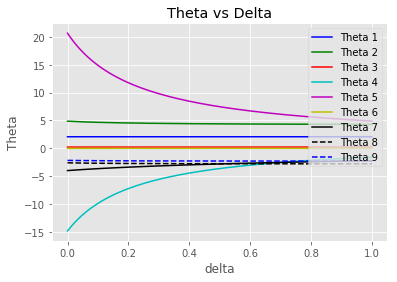

In [34]:
x1, = plt.plot(delta_value, theta1, "b-", label="Theta 1") 
x2, = plt.plot(delta_value, theta2, "g-", label="Theta 2") 
x3, = plt.plot(delta_value, theta3, "r-", label="Theta 3") 
x4, = plt.plot(delta_value, theta4, "c-", label="Theta 4")
x5, = plt.plot(delta_value, theta5, "m-", label="Theta 5") 
x6, = plt.plot(delta_value, theta6, "y-", label="Theta 6") 
x7, = plt.plot(delta_value, theta7, "k-", label="Theta 7") 
x8, = plt.plot(delta_value, theta8, "k--", label="Theta 8")
x9, = plt.plot(delta_value, theta9, "b--", label="Theta 9")

plt.title('Theta vs Delta')
plt.xlabel('delta')
plt.ylabel('Theta')
plt.legend(handles=[x1, x2, x3, x4, x5, x6, x7, x8, x9], loc=1)

# Plot B : Compute test and train error for different values of Delta.

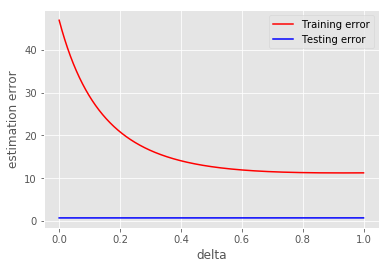

In [50]:
delta_n = len(delta_value)
delta_value= np.array(delta_value)

val_loss_nq_all = np.array(val_loss_nq_all)
val_loss_nq_all = np.reshape(val_loss_nq_all, (delta_n))

test_loss_nq_all = np.array(test_loss_nq_all)
test_loss_nq_all = np.reshape(test_loss_nq_all, (delta_n))

plt.xlabel('delta')
plt.ylabel('estimation error')

x1, = plt.plot(delta_value, val_loss_nq_all, "r-", label="Training error") 
x2, = plt.plot(delta_value, test_loss_nq_all, "b-", label="Testing error") 
plt.legend(handles=[x1, x2], loc=1)

#plt.plot(delta_value, val_loss_nq_all, "r-", delta_value, test_loss_nq_all, "b-")

In [55]:
min_value_index = np.argmin(test_loss_nq_all)
print('Smallest Loss: ', test_loss_nq_all[min_value_index])

Smallest Loss:  0.732330237876


In [53]:
best_delta = delta_value[7]
print(best_delta)

0.000700070007001


## Other Models

In [38]:
from sklearn import linear_model

In [39]:
def cost_function_other_models(Y_out, Y):
    # Compute Cost
    Cost = np.sqrt((1/len(X)) * np.sum((Y - Y_out)**2))

    return Cost 

In [40]:
reg = linear_model.BayesianRidge()

In [41]:
reg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [42]:
test_predictions = reg.predict(X_test)

In [43]:
loss_test_bayReg = cost_function_other_models(test_predictions, y_test)

In [44]:
print(loss_test_bayReg)

0.327519128539


In [45]:
lasso_reg = linear_model.LassoLars(alpha=1)
lasso_reg.fit(X_train, y_train)

LassoLars(alpha=1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [46]:
test_predictions_lasso = lasso_reg.predict(X_test)

In [47]:
loss_test_LassoReg = cost_function_other_models(test_predictions_lasso, y_test)

In [48]:
print(loss_test_LassoReg)

0.510550130973
